<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [58]:
sac_csv = '../../data/sacramento_real_estate_transactions.csv'

In [59]:
import pandas as pd

shd = pd.read_csv(sac_csv)

shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [60]:
# Check the dtypes
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [61]:
# Zip code is better as a string object (categorical) so I will have to convert it.
shd['zip'] = shd['zip'].astype(str)

_**Fun Fact:** Zip codes often have leading zeros, i.e 02215 = Boston, MA, which will often get knocked off automatically by many softwares like Python and Excel. You can imagine that this could create some issues. _

In [62]:
# Check out the summary statistics:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [30]:
# Looks like we have some values that seem out of place being that there are
# houses with 0 bedrooms,  0 baths, a negative sqr footage and a negative price.  
# There are also some bizarre longitudes/latitudes. A house in Antartica perhaps. 

In [63]:
# Check out the cities. Most cities with very few observations.
shd.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
GRANITE BAY          3
WEST SACRAMENTO      3
POLLOCK PINES        3
RANCHO MURIETA       3
LOOMIS               2
EL DORADO            2
MEADOW VISTA         1
MATHER               1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
FORESTHILL           1
SLOUGHHOUSE          1
GREENWOOD            1
PENRYN               1
GARDEN VALLEY        1
Name: city, dtype: int64

In [64]:
# Whats the deal with the houses that have 0 bedrooms?
shd[shd['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [65]:
print(shd[shd['beds'] == 0].shape)

(108, 12)


In [34]:
# Given the large value of houses that have 0 beds, 0 baths and 0 square feet 
# I am going to make an assumption that these are plots of land that have yet
# to have anything built on them.
# As a result I will *not* be dropping them.

In [66]:
# what about those houses that are less than 0 dollars?
shd[shd['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [67]:
# And the negative square feet?
shd[shd['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [37]:
# Looks like the house with a negative price is also the one with a negative squarefeet.
# It is time to make a choice.  Assume that the data was entered improperly and is meant 
# to be possitive or drop the data.

# Side note, the state is actually labeled wrong as well.

In [68]:
# Let me check if any other values are also not labeled right.
shd[shd['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [69]:
#Looks like it is just one row, so I am going to drop it.

shd.drop(703, inplace = True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [40]:
# Id say we can use 'beds','baths','sq__ft'
# Maybe 'latitude' & 'longitude', but that's more involved.

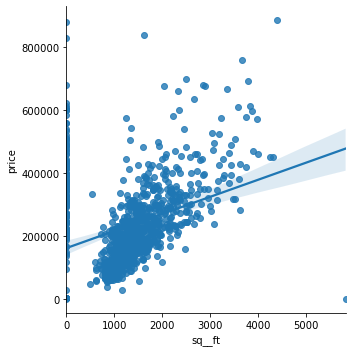

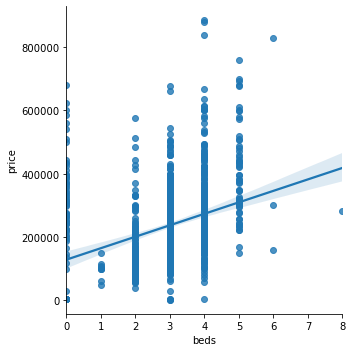

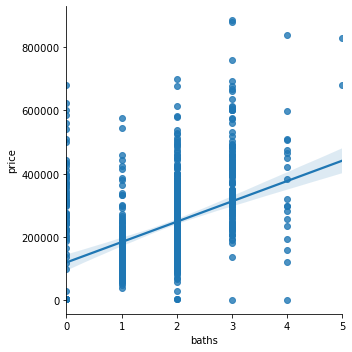

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

When you're  all done cleaning or made a good deal a progress cleaning, it is never a bad idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [42]:
# It looks like Square Footage is a better predictor than Beds or Baths.
# Beds and Baths are discrete measures as opposed to Square feet, which is continuous.  
# Additionally, there is probably some strong coorelations between them in that houses 
# with bigger square feet will have more beds and more baths.

# If we dropped all the plots of land that are in the dataset (those with 0 sq ft, 
# beds & baths)  we would see a much stronger trend line in our lm plot.

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients.

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [71]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [72]:
import numpy as np
import scipy.stats

# Get the optimal Slope and y intercept

def lin_reg_func(x,y):
    # Using other libraries for standard Deviation and Pearson Correlation Coef.
    # Note that in SLR, the correlation coefficient multiplied by the standard
    # deviation of y divided by standard deviation of x is the optimal slope.
    linreg.fit(x, y)
    beta_1 = linreg.coef_
    #(scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    

    beta_0 = linreg.intercept_
    
    #Print the Optimal Values
    print('The Optimal Y Intercept is ', beta_0)
    print('The Optimal slope is ', beta_1)

In [73]:
x = shd[['sq__ft']]
y = shd.price
lin_reg_func(x,y)

The Optimal Y Intercept is  162938.7375609863
The Optimal slope is  [54.15619752]


### 6. Interpret the intercept. Interpret the slope.

In [46]:
# The intercept should be the relative y value that our data starts around 
# in that from this point out, as x increase so should the y value from this point.

# The intercept is an "offset". Without the intercept our regression line would
# be forced to pass through the origin.

# The slope is the increase in our target (price) variable for a 1-unit increase
# in our predictor variable (sq__ft). So, for every sq__ft increase there is
# an associated increase of ~54 dollars.

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [47]:
# Prediction
# You are a real estate agent with a separate database on house characteristics and locations.
# You want to estimate the most likely price that one of these houses will sell at based
# on the model that we built using this data.

# Inference
# You work for an architecture company that wants to understand what characteristics of a house
# and what areas are associated with perceived value. You have some hypotheses about what
# makes a house valuable but you would like to test these hypotheses.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [74]:
# predictor: y = 162938.74 + 54.16x
# Creating a list of predicted values
y_pred = []

for x in shd['sq__ft']:
    y = 162938.74 + (54.16*x)
    y_pred.append(y)


In [75]:
y_pred

[208216.5,
 226143.46,
 206050.09999999998,
 209083.06,
 206104.25999999998,
 223706.25999999998,
 222731.38,
 226685.06,
 213903.3,
 225006.09999999998,
 212170.18,
 232750.97999999998,
 210112.09999999998,
 218181.94,
 218290.25999999998,
 224356.18,
 208649.77999999997,
 205995.94,
 194784.81999999998,
 236379.69999999998,
 223489.62,
 234917.38,
 230097.13999999998,
 249648.89999999997,
 211736.9,
 221864.81999999998,
 215094.81999999998,
 223543.77999999997,
 237679.53999999998,
 230530.41999999998,
 219210.97999999998,
 225331.06,
 237679.53999999998,
 223381.3,
 219210.97999999998,
 239737.62,
 221539.86,
 242662.25999999998,
 225006.09999999998,
 204100.34,
 233563.38,
 228309.86,
 220131.69999999998,
 219427.62,
 248890.65999999997,
 223597.94,
 248511.53999999998,
 268821.54,
 252627.69999999998,
 242933.06,
 227280.81999999998,
 249053.13999999998,
 242174.82,
 255768.97999999998,
 227118.34,
 239087.69999999998,
 268171.62,
 226414.25999999998,
 225331.06,
 263188.899999999

In [76]:
# Appending the predicted values to the Sacramento housing dataframe to do DF calcs
shd['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred
shd['Residuals'] = abs(shd['price']-shd['Pred'])

In [77]:
shd['Residuals'].mean()
# the mean of our residuals is aproximately $96,000, which means that is
# on average how off our prediction is.

95954.3812601626

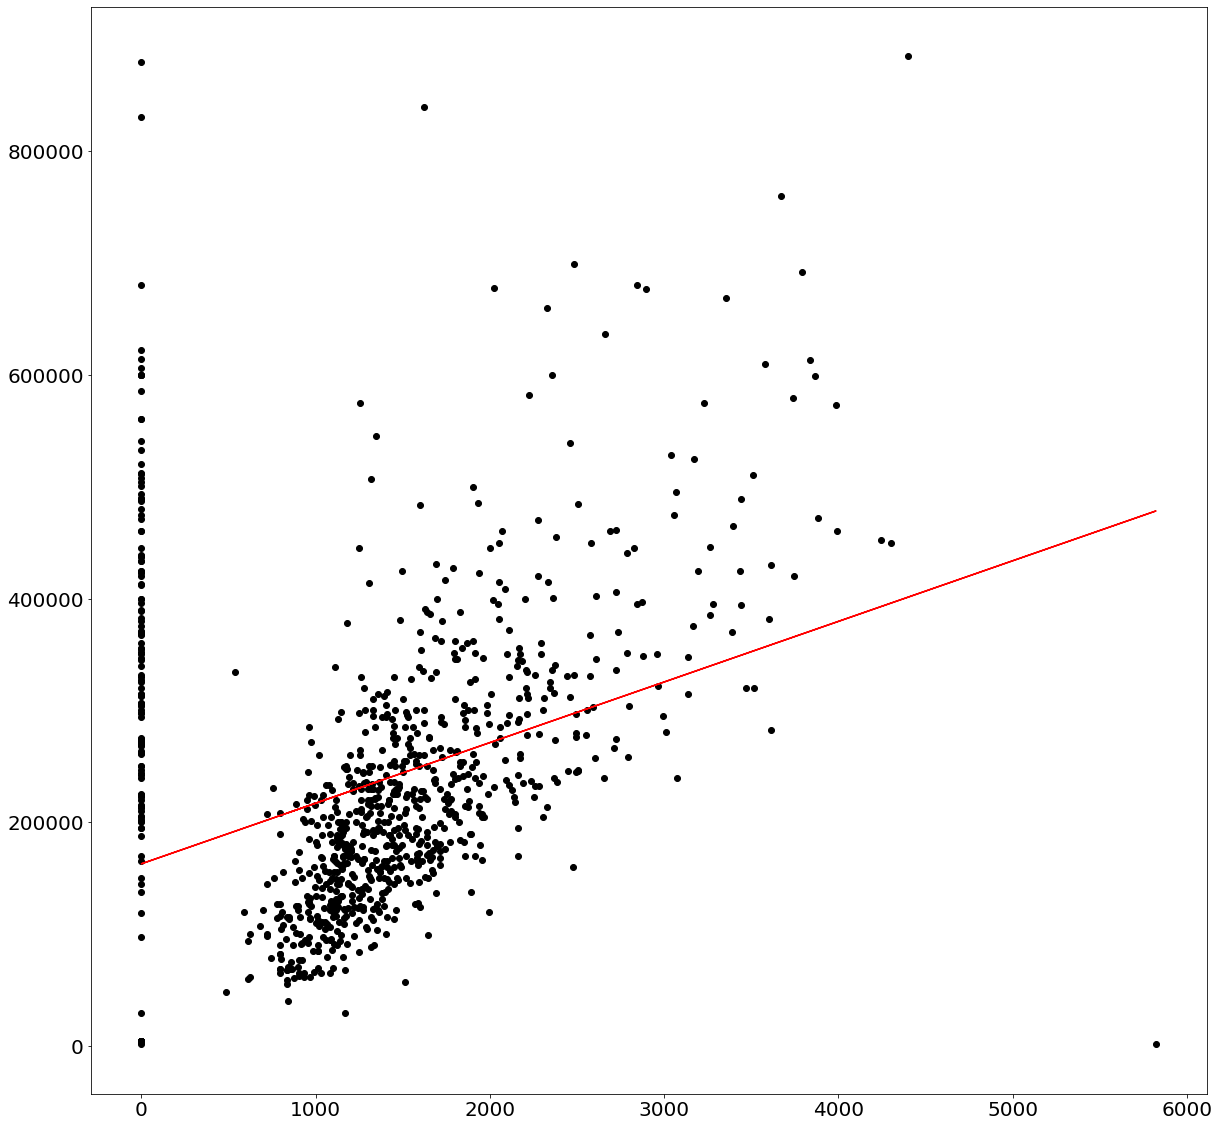

In [78]:
# Plot showing out linear forcast
fig = plt.figure(figsize=(20,20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

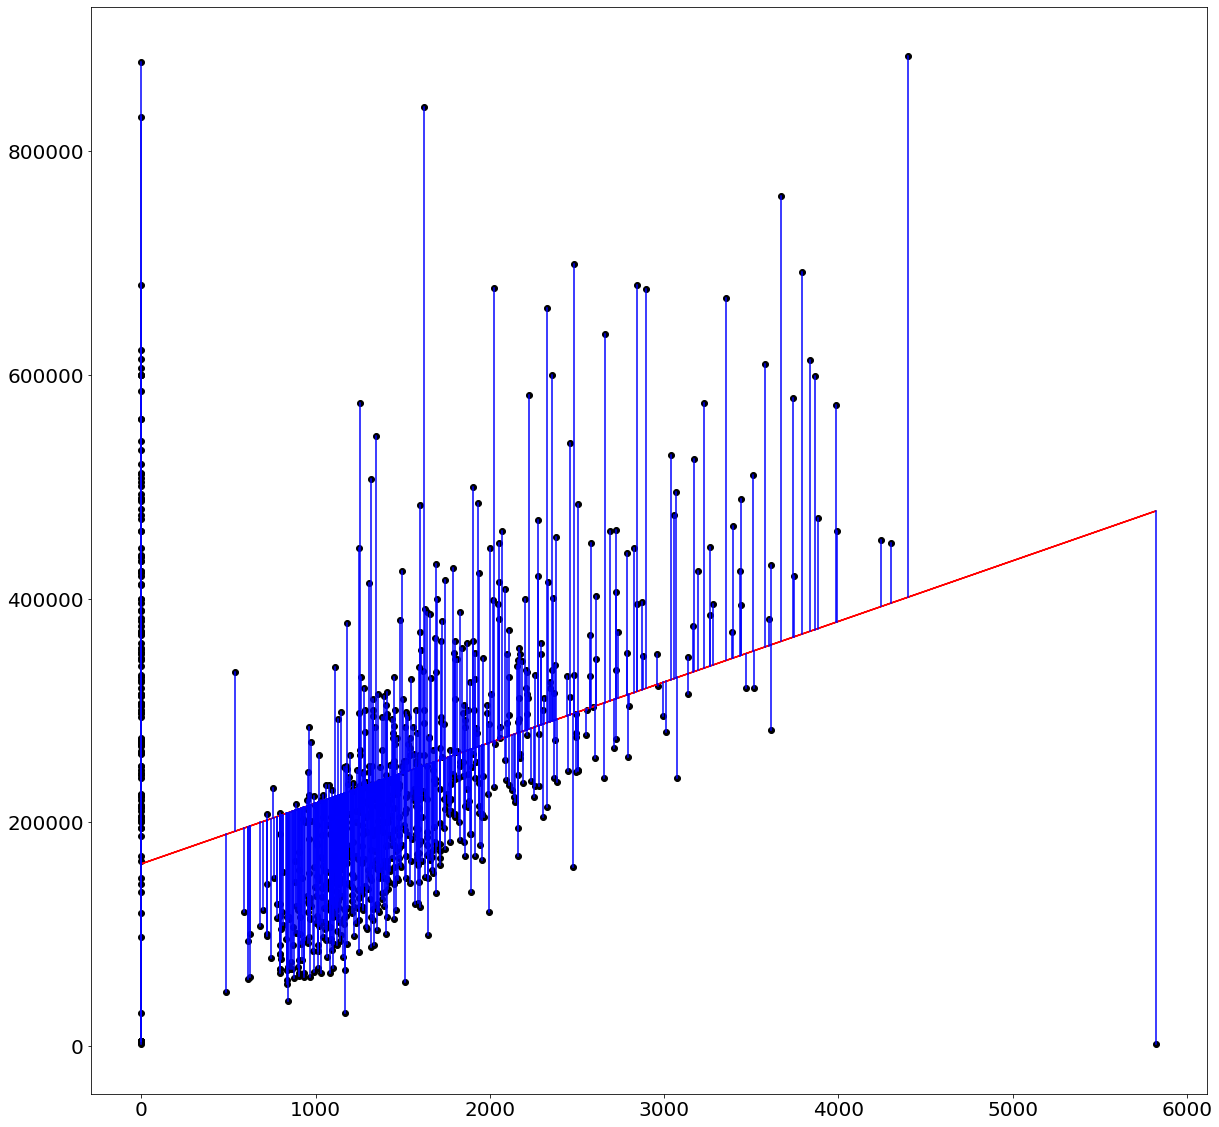

In [79]:
# Plot with residuals
fig = plt.figure(figsize=(20,20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

# iterate over predictions
for _, row in shd.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Pred']), 'b-')

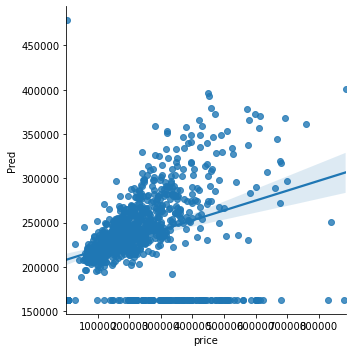

In [53]:
# One more plot, Lets look how our Predictions compared to the true values.
sns.lmplot(x='price', y='Pred', data=shd)

In [54]:
# Given our last visual we can see that a lot of points were plotted along the 
# y-intercept (y= 162938.74).  Those were all the houses with a reported
# square footage of 0 feet.  We could probably create a more insightful
# model if we removed those observations from our data.